In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import json
import collections

# Apply the default theme
sns.set_style("ticks")
sns.set_context("paper")

# Declare files.
files = {
    "0.95": "/data/rsg/nlp/fisch/projects/few-shot-cp/ckpts/chembl/k=16/conformal/q=0.95/val-trials=5000-results.jsonl",
    "0.90": "/data/rsg/nlp/fisch/projects/few-shot-cp/ckpts/chembl/k=16/conformal/q=0.90/val-trials=5000-results.jsonl",
    "0.80": "/data/rsg/nlp/fisch/projects/few-shot-cp/ckpts/chembl/k=16/conformal/q=0.80/val-trials=5000-results.jsonl",
    "0.70": "/data/rsg/nlp/fisch/projects/few-shot-cp/ckpts/chembl/k=16/conformal/q=0.70/val-trials=5000-results.jsonl",
    "0.60": "/data/rsg/nlp/fisch/projects/few-shot-cp/ckpts/chembl/k=16/conformal/q=0.60/val-trials=5000-results.jsonl",
    "0.50": "/data/rsg/nlp/fisch/projects/few-shot-cp/ckpts/chembl/k=16/conformal/q=0.50/val-trials=5000-results.jsonl",
    "0.40": "/data/rsg/nlp/fisch/projects/few-shot-cp/ckpts/chembl/k=16/conformal/q=0.40/val-trials=5000-results.jsonl",
    "0.30": "/data/rsg/nlp/fisch/projects/few-shot-cp/ckpts/chembl/k=16/conformal/q=0.30/val-trials=5000-results.jsonl",
    "0.20": "/data/rsg/nlp/fisch/projects/few-shot-cp/ckpts/chembl/k=16/conformal/q=0.20/val-trials=5000-results.jsonl",
    "0.10": "/data/rsg/nlp/fisch/projects/few-shot-cp/ckpts/chembl/k=16/conformal/q=0.10/val-trials=5000-results.jsonl",
    "0.05": "/data/rsg/nlp/fisch/projects/few-shot-cp/ckpts/chembl/k=16/conformal/q=0.05/val-trials=5000-results.jsonl",
}

# Each has row entries of the form:
# {"epsilon": eps, "lambda": lmb, "results": {"meta": {"acc": [avg, std, p84, p16], "eff": [...]}, "exact": {...}}}
# Here we only plot results for lambda = 0.
exact = collections.defaultdict(dict)
meta = collections.defaultdict(dict)
for q, fname in files.items():
    with open(fname, "r") as f:
        for line in f:
            trial = json.loads(line)
            key = round(1 - trial["epsilon"], 2)
            res = trial["result"]
            if trial["delta"] != 0:
                continue
            meta[q][key] = (res["meta"]["acc"], res["meta"]["eff"])
            if key not in exact:
                exact[key] = (res["exact"]["acc"], res["exact"]["eff"])

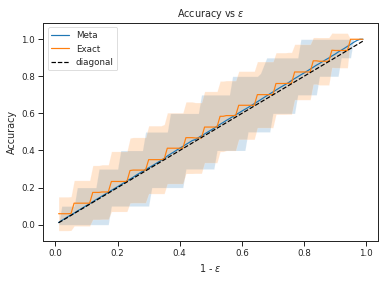

In [2]:
all_x = set()
y = {}
for q, values in meta.items():
    x = sorted(values.keys())
    all_x.update(x)
    for i in x:
        # There is some overlap in values of epsilon for quantile predictions,
        # we take the smaller of the overlaps.
#         import pdb; pdb.set_trace()
        if i in y:
            y[i] = min(y[i], values[i][0])
        else:
            y[i] = values[i][0]
all_x = sorted(list(all_x))
ys = [y[i][0] for i in all_x]
low = [y[i][2] for i in all_x]
high = [y[i][3] for i in all_x]
plt.plot(all_x, ys, '-', label="Meta")
plt.fill_between(all_x, low, high, alpha=0.2)

x = sorted(exact.keys())
y = [exact[i][0][0] for i in x]
low = [exact[i][0][0] - exact[i][0][1] for i in all_x]
high = [exact[i][0][0] + exact[i][0][1] for i in all_x]
plt.plot(x, y, '-', label="Exact")
plt.fill_between(all_x, low, high, alpha=0.2)

plt.plot(all_x, all_x, "--", color="k", label="diagonal")

plt.xlabel("1 - $\epsilon$")
plt.ylabel("Accuracy")
plt.title("Accuracy vs $\epsilon$")
plt.legend()

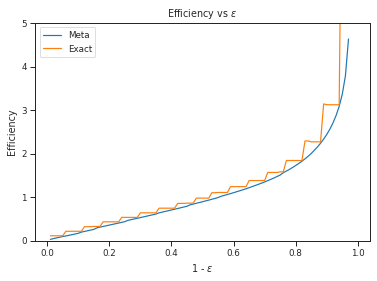

In [3]:
all_x = set()
y = {}
for q, values in meta.items():
    x = sorted(values.keys())
    all_x.update(x)
    for i in x:
        if i in y:
            y[i] = min(y[i], values[i][1][0])
        else:
            y[i] = values[i][1][0]
all_x = sorted(list(all_x))
y = [y[i] for i in all_x]
plt.plot(all_x, y, '-', label="Meta")

x = sorted(exact.keys())
y = [min(exact[i][1][0],10) for i in x]
plt.ylim(-0.0, 5)
# y = [min(i, 10) for i in y]
plt.plot(x, y, '-', label="Exact")
plt.xlabel("1 - $\epsilon$")
plt.ylabel("Efficiency")
plt.title("Efficiency vs $\epsilon$")
plt.legend()

In [4]:
print("=" * 50)
print("Meta:")
print("=" * 50)
print("1-eps & meta acc & exact acc & meta size & exact size")
for q in meta.keys():
    qq = float(q)
    exact_values = exact[float(q)]
    print("%2.2f & %2.2f & %2.2f & %2.2f & %2.2f" % (qq, meta[q][qq][0][0], exact_values[0][0], meta[q][qq][1][0], exact_values[1][0]))
#     print("1-eps: %2.2f | %2.2f\t%2.2f" % (qq, meta[q][qq][0][0], meta[q][qq][1][0]))

Meta:
1-eps & meta acc & exact acc & meta size & exact size
0.95 & 0.97 & 1.00 & 3.37 & inf
0.90 & 0.92 & 0.94 & 2.44 & 3.12
0.80 & 0.82 & 0.82 & 1.72 & 1.84
0.70 & 0.72 & 0.70 & 1.35 & 1.38
0.60 & 0.61 & 0.64 & 1.10 & 1.24
0.50 & 0.51 & 0.53 & 0.89 & 0.97
0.40 & 0.41 & 0.41 & 0.70 & 0.74
0.30 & 0.31 & 0.35 & 0.53 & 0.64
0.20 & 0.20 & 0.23 & 0.35 & 0.43
0.10 & 0.10 & 0.12 & 0.18 & 0.21
0.05 & 0.05 & 0.06 & 0.09 & 0.11


In [5]:
print("=" * 50)
print("Exact:")
print("=" * 50)
for q in meta.keys():
    values = exact[float(q)]
    qq = float(q)
    print("1-eps: %2.2f | %2.2f\t%2.2f" % (qq, values[0][0], values[1][0]))

Exact:
1-eps: 0.95 | 1.00	inf
1-eps: 0.90 | 0.94	3.12
1-eps: 0.80 | 0.82	1.84
1-eps: 0.70 | 0.70	1.38
1-eps: 0.60 | 0.64	1.24
1-eps: 0.50 | 0.53	0.97
1-eps: 0.40 | 0.41	0.74
1-eps: 0.30 | 0.35	0.64
1-eps: 0.20 | 0.23	0.43
1-eps: 0.10 | 0.12	0.21
1-eps: 0.05 | 0.06	0.11


# qunatile pred convergence 

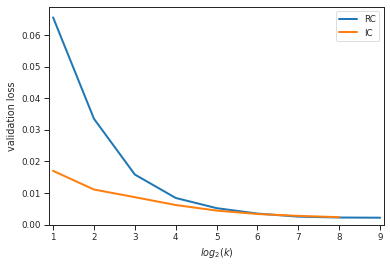

In [50]:
# ks = [2, 4, 8, 16, 32, 64, 128, 256, 512]
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9]
path = "/data/rsg/nlp/tals/coverage/meta_cp/few-shot-cp/fewrel/results/10_way/k=%s/q=0.80/logs/default/version_1/metrics.csv"

losses = []
for k in ks:
    p = path % 2**k
    with open(p, 'r') as f:
        last_line = f.readlines()[-1].strip()
    val_loss = float(last_line.split(',')[-1])
    losses.append(val_loss)
    
x = ks
y = losses
max_y = max(y)
max_x = max(x)
plt.plot(x, y, '-', label="RC", linewidth=2)

path = "/data/rsg/nlp/tals/coverage/meta_cp/few-shot-cp/mini_imagenet/results/10_way/k=%s/q=0.80/logs/default/version_1/metrics.csv"

losses = []
for k in ks:
    p = path % 2**k
    if os.path.exists(p):
        with open(p, 'r') as f:
            last_line = f.readlines()[-1].strip()
        val_loss = float(last_line.split(',')[-1])
        losses.append(val_loss)
    
x = ks[:len(losses)]
y = losses
max_y = max(max(y), max_y)
max_x = max(max(x), max_x)
plt.plot(x, y, '-', label="IC", linewidth=2)

plt.ylim(-0.0, 1.05*max_y)
plt.xlim(0.9, 1.01*max_x)


plt.xlabel("$log_2(k)$")
plt.ylabel("validation loss")
# plt.xscale('log', basex=2)
plt.legend()

Text(0, 0.5, 'validation loss')

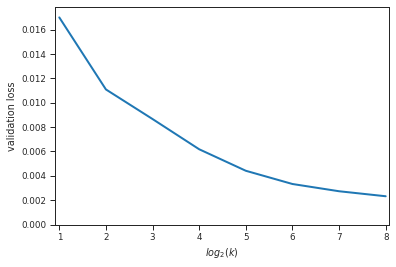

In [46]:
import os

# ks = [2, 4, 8, 16, 32, 64, 128, 256, 512]
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9]
path = "/data/rsg/nlp/tals/coverage/meta_cp/few-shot-cp/mini_imagenet/results/10_way/k=%s/q=0.80/logs/default/version_1/metrics.csv"

losses = []
for k in ks:
    p = path % 2**k
    if os.path.exists(p):
        with open(p, 'r') as f:
            last_line = f.readlines()[-1].strip()
        val_loss = float(last_line.split(',')[-1])
        losses.append(val_loss)
    
x = ks[:len(losses)]
y = losses
plt.ylim(-0.0, 1.05*max(y))
plt.xlim(0.9, 1.01*max(x))
plt.plot(x, y, '-', label="loss", linewidth=2)
plt.xlabel("$log_2(k)$")
plt.ylabel("validation loss")
# plt.xscale('log', basex=2)
# plt.legend()

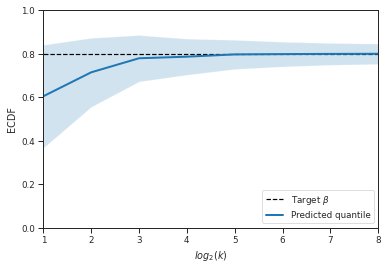

In [123]:
import os

plt.plot([0,10], [0.8, 0.8], '--', label='Target $\\beta$', color='black')

# for task in ['fewrel', 'mini_imagenet']:
for task in ['mini_imagenet']:
    ks = [1,2,3,4,5,6,7,8]
    path = "/data/rsg/nlp/tals/coverage/meta_cp/few-shot-cp/%s/results/10_way/k=%s/q=0.80/predictions.jsonl"
    means = []
    stds= []
    for k in ks:
        p = path % (task, 2**k)
        if os.path.exists(p):
            qs = []
            with open(p, 'r') as f:
                for line in f.readlines():
                    d = json.loads(line)
#                     q = max(0, 0.8 - np.sum(np.array(d['scores']) <= d['pred']) / len(d['scores']))
                    q = np.sum(np.array(d['scores']) <= d['pred']) / len(d['scores'])
                    qs.append(q)

            means.append(np.mean(qs))
            stds.append(np.std(qs))

    x = ks[:len(means)]
    y = means
    low = [y - s for (y,s) in zip(means, stds)]
    high = [y + s for (y,s) in zip(means, stds)]

    plt.plot(x, y, '-', label='Predicted quantile', linewidth=2)
    plt.fill_between(x, low, high, alpha=0.2)

plt.xlabel("$log_2(k)$")
plt.ylabel("ECDF")
plt.ylim(0.0, 1)
plt.xlim(1, len(ks))
# plt.xscale('log', basex=2)
plt.legend(loc=4)